In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   a

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [5]:
df.shape

(100000, 9)

(100000, 9)

In [6]:
df.isnull().sum().sum()

0

0

In [7]:
df.duplicated().sum()

3854

3854

In [8]:
df=df.drop_duplicates(subset=None, keep='first', inplace=False)

In [9]:
df.duplicated().sum()

0

0

In [10]:
x = df.drop('diabetes', axis=1)  # Features
y = df['diabetes']              # Target

**Train Test Split the model**

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

**Feature Scaling**

In [12]:
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)
df_encoded

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,36.0,0,0,24.60,4.8,145,0,0,0,0,0,0,0,0
99996,2.0,0,0,17.37,6.5,100,0,0,0,0,0,0,0,0
99997,66.0,0,0,27.83,5.7,155,0,1,0,0,0,1,0,0
99998,24.0,0,0,35.42,4.0,100,0,0,0,0,0,0,1,0


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,36.0,0,0,24.60,4.8,145,0,0,0,0,0,0,0,0
99996,2.0,0,0,17.37,6.5,100,0,0,0,0,0,0,0,0
99997,66.0,0,0,27.83,5.7,155,0,1,0,0,0,1,0,0
99998,24.0,0,0,35.42,4.0,100,0,0,0,0,0,0,1,0


In [13]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_encoded)

pca = PCA(n_components=2)  
principal_components = pca.fit_transform(standardized_data)

pca_df = pd.DataFrame(
    principal_components,
    columns=['Principal Component 1', 'Principal Component 2']
)

print("Principal Components:\n", pca_df)

Principal Components:
        Principal Component 1  Principal Component 2
0                   1.910400               0.822100
1                  -0.355466              -0.076541
2                  -0.391394               1.046059
3                  -0.695524              -1.156873
4                   2.444522              -2.464418
...                      ...                    ...
96141              -0.850258              -0.102131
96142              -1.730505              -0.121521
96143               1.042745              -1.698630
96144              -1.136270               1.423416
96145              -0.393497              -1.191796

[96146 rows x 2 columns]
Principal Components:
        Principal Component 1  Principal Component 2
0                   1.910400               0.822100
1                  -0.355466              -0.076541
2                  -0.391394               1.046059
3                  -0.695524              -1.156873
4                   2.444522              -2

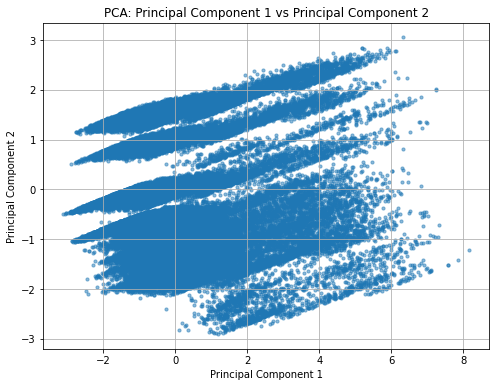

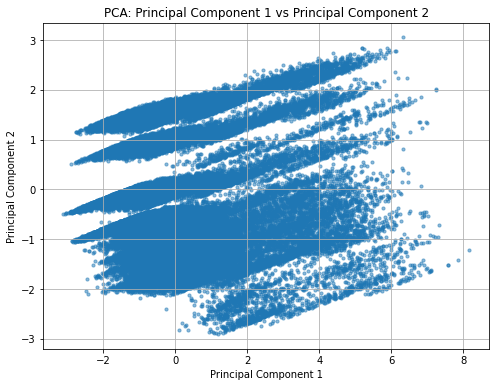

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.5, s=10)
plt.title('PCA: Principal Component 1 vs Principal Component 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

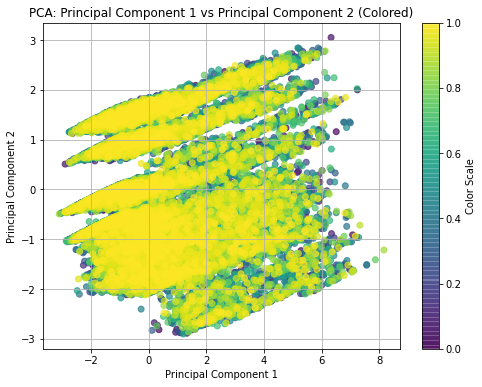

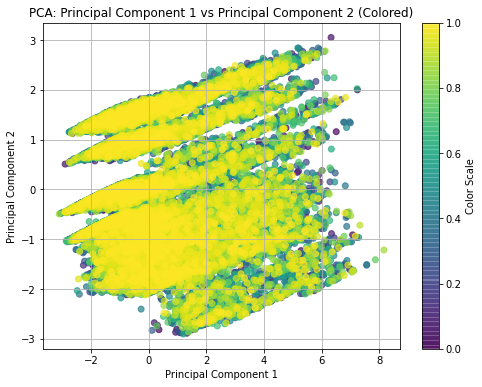

In [15]:
plt.figure(figsize=(8, 6))
colors = np.linspace(0, 1, len(pca_df))
plt.scatter(
    pca_df['Principal Component 1'],
    pca_df['Principal Component 2'],
    c=colors,          
    cmap='viridis',    
    alpha=0.7         
)
plt.title('PCA: Principal Component 1 vs Principal Component 2 (Colored)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(label='Color Scale') 
plt.show()

**apply hyperparameter tuning to the model**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Ensure features and target are taken from the encoded DataFrame
x_encoded = df_encoded.drop('diabetes', axis=1)  # Features
y_encoded = df_encoded['diabetes']              # Target

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x_encoded, y_encoded, test_size=0.25, random_state=0
)

# SVM Model with Linear Kernel
svc = SVC(kernel='linear', random_state=0)

# Hyperparameter grid for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]  # Test various regularization values
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model on the training data
grid_search.fit(x_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'C': 0.1}

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     21989
           1       0.90      0.60      0.72      2048

    accuracy                           0.96     24037
   macro avg       0.93      0.79      0.85     24037
weighted avg       0.96      0.96      0.96     24037



Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     21989
           1       0.90      0.60      0.72      2048

    accuracy                           0.96     24037
   macro avg       0.93      0.79      0.85     24037
weighted avg       0.96      0.96      0.96     24037

Accuracy Score: 0.9596871489786579


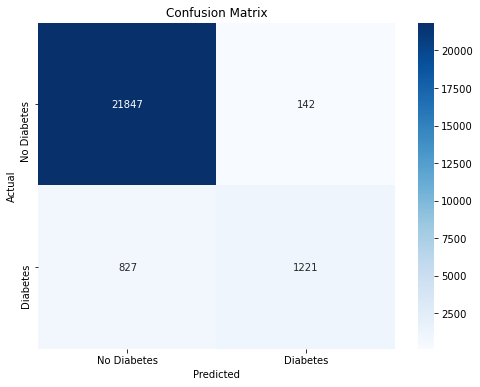

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


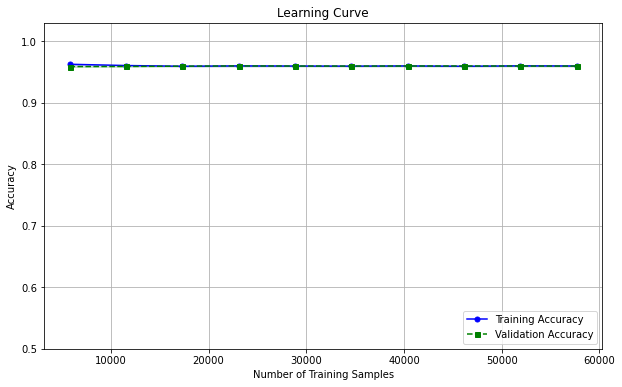

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_model,  # Use the best model obtained from grid search
    X=x_train, 
    y=y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    cv=5,  # Use 5-fold cross-validation
    scoring='accuracy', 
    n_jobs=-1  # Use all available cores
)

# Compute mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.03])
plt.grid()
plt.show()
